# Fractales aleatorios

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/fa/Fractal_Crown_of_morgoth2_5600x4200.jpg" width="350px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/80/Super-volcano_Tierazon_fractal_Tiera4414.jpg" width="350px" height="125px" />


**Referencias:**
- http://fractalfoundation.org/resources/what-are-fractals/
- https://georgemdallas.wordpress.com/2014/05/02/what-are-fractals-and-why-should-i-care/
- https://en.wikipedia.org/wiki/Barnsley_fern
- http://www.home.aone.net.au/~byzantium/ferns/fractal.html

Antes que nada, ¿qué son fractales?

___
## 1. Fractales

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/2/21/Mandel_zoom_00_mandelbrot_set.jpg" width="400px" height="125px" />

- La geometría fractal es un campo de las matemáticas que tiene lugar a partir de los años setenta, y fue desarrollada principalmente por [Benoit Mandelbrot](https://es.wikipedia.org/wiki/Beno%C3%AEt_Mandelbrot).

- La geometría elemental que aprendimos en la escuela se trataba de estudiar (y hacer) formas o figuras. Pues bien, la geometría fractal no es distinta.

- Mientras que en geometría clásica las formas son suaves (círculos, triángulos, etcétera), las formas que produce la geometría fractal es tosca e infinitamente compleja.

Bueno, ¿y cuál es su importancia?
1. El proceso por el cual se obtienen formas fractales es impresionantemente simple y completamente diferente al seguido en geometría clásica. Mientras la geometría clásica se usan fórmulas para definir una forma, la geometría fractal usa iteración. Básicamente, podríamos decir que los fractales son imágenes de sistemas dinámicos.

2. Las formas fractales se parecen mucho a formas encontradas en la naturaleza. Este impresionante hecho es difícil de ignorar. Como sabemos no existen círculos perfectos en la naturaleza, ni cuadrados perfectos. No es solo eso, el solo mirar los árboles, ríos o montañas, y no se encuentra una forma que sea descrita por una fórmula. Sin embargo, usando fórmulas simples iteradas muchas veces, la geometría fractal puede modelar esos fenómenos con alta precisión. Si puedes usar matemáticas simples para modelar el mundo, vas por buen camino.


<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Fractal_canopy.svg/1200px-Fractal_canopy.svg.png" width="400px" height="125px" />

### 1.1 Transformaciones afines

La naturaleza de cualquier transformación afín permite clasificar a ésta dentro de dos grandes grupos: lineales y no lineales. La diferencia fundamental entre ellas reside en que las primeras respetan las líneas rectas que constituyen la forma geométrica sobre la que se aplican, mientras que las segundas no, y por tanto actúan sobre ellas alterando algo más que su posición, orientación y tamaño.

Tomemos como figura geométrica inicial un cuadrado de lado $L$ y situémoslo en un sistema de referencia arbitrario, de forma tal que su vértice inferior izquierdo coincida con el origen. Cada punto en la frontera o dentro del cuadrado puede así caracterizarse por un par de coordenadas $(x, y)$, donde $x$ y $y$ representan números que siempre son mayores que 0 pero menores que $L$.

Referencia: [Fractus, fracta, fractal. Fractales, de laberintos y espejos](http://bibliotecadigital.ilce.edu.mx/sites/ciencia/volumen3/ciencia3/147/htm/fractus.htm)

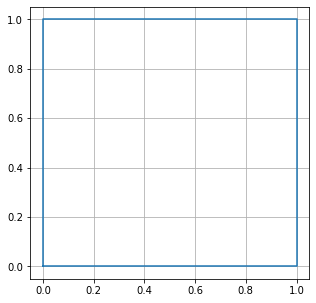

In [2]:
# Construímos un cuadro de lado 'L'

import matplotlib.pyplot as plt
%matplotlib inline

L = 1

x = [0, L, L, 0, 0]
y = [0, 0, L, L, 0]

plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.grid()



¿Cómo construir una transformación geométrica que aplicada sobre cada punto de este cuadrado dé lugar a una forma similar; pero de la mitad de tamaño que la original?

El problema se resuelve fácilmente si consideramos que las coordenadas de todo punto en la nueva figura, que llamaremos $(x_n, y_n)$ para distinguirlas, pueden generarse a partir de las de la primera $(x, y)$ siguiendo una regla que reduzca todo a la mitad, tanto en la dirección $x$ como en la $y$:
\begin{eqnarray}
x_n&=&0.5x\\
y_n&=&0.5y
\end{eqnarray}
Para ilustrarlo basta, por ejemplo, aplicar la receta anterior a las coordenadas de los cuatro vértices del cuadrado inicial:
\begin{eqnarray*}
(0,0)&\rightarrow&(0,0)\\
(0,L)&\rightarrow&(0,L/2)\\
(L,0)&\rightarrow&(L/2,0)\\
(L,L)&\rightarrow&(L/2,L/2)
\end{eqnarray*}
En un caso como este se dice que la transformación ha introducido un factor de escala $r=0.5$. Como la figura no ha sido deformada se dice que se ha hecho una transformación de **similitud**.

Si se utilizan parámetros de escala distintos para cada coordenada, el resultado ya no es un cuadrado regular, si no un rectángulo de lados distintos. Esta transformación de carácter más general se conoce como transformación **afín**.

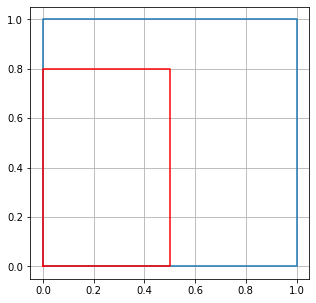

In [7]:
import numpy as np

r = 0.5
s = 0.8

x = np.array([0, L, L, 0, 0])
y = np.array([0, 0, L, L, 0])

xn = r*x
yn = s*y

plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.plot(xn, yn, "r")
plt.grid()


La transformación afín permite además trasladar el objeto y rotarlo.

Para desplazar nuestro cuadrado, es importante notar que todo cambio en la posición de una figura puede descomponerse en desplazamientos simples paralelos a cada uno de los ejes del sistema de referencia elegido: primero la movemos horizontalmente y luego verticalmente (o al revés). Sin embargo, para asegurar que la forma mantiene su estructura durante el proceso, es necesario que todos los puntos en ella se trasladen de la misma manera.
\begin{eqnarray}
x_n=x+e\\
y_n=y+f
\end{eqnarray}
Ahora, ¿qué hacer para trasladar y reescalar simultáneamente la forma geométrica? Pues como cada cosa se puede hacer de manera independiente, basta ponerlo todo junto:
\begin{eqnarray}
x_n=r\;x+e\\
y_n=s\;y+f
\end{eqnarray}

(0.0, 3.0)

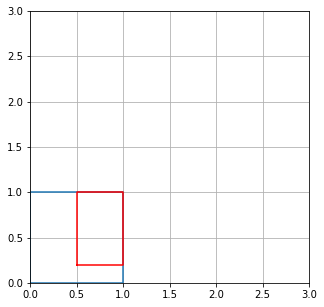

In [13]:
r = 0.5
s = 0.8

e = 0.5
f = 0.2

x = np.array([0, L, L, 0, 0])
y = np.array([0, 0, L, L, 0])

xn = r*x + e
yn = s*y + f

plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.plot(xn, yn, "r")
plt.grid()

plt.xlim([0, 3])
plt.ylim([0, 3])


Cuando se desea rotar una figura cuyos puntos se designan con las coordenadas $(x, y)$, basta aplicar sobre todos ellos la siguiente transformación para obtener las coordenadas $(x_n, y_n)$ de la nueva figura:
\begin{eqnarray}
x_n&=&x\cos(\alpha)-y\sin(\beta)\\
y_n&=&x\sin(\alpha)+y\cos(\beta),
\end{eqnarray}
donde $\alpha$ y $\beta$ son los ángulos en que se rotan los lados horizontales y verticales de la figura original, medidos con respecto a los ejes $x$ y $y$, respectivamente.

La transformación más general resulta entonces
\begin{eqnarray}
x_n&=&r\;x\cos(\alpha)-s\;y\sin(\beta)+e\\
y_n&=&r\;x\sin(\alpha)+s\;y\cos(\beta)+f
\end{eqnarray}

 x

$1x^1$

(-1.0, 2.0)

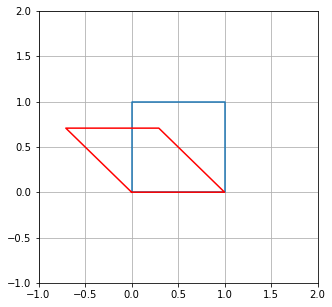

In [27]:
r = 1
s = 1

e = 0
f = 0

alpha = 0
beta =  1*np.pi/4

x = np.array([0, L, L, 0, 0])
y = np.array([0, 0, L, L, 0])

xn = r*np.cos(alpha)*x - s*np.sin(beta)*y + e
yn = r*np.sin(alpha)*x + s*np.cos(beta)*y + f

plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.plot(xn, yn, "r")
plt.grid()

plt.xlim([-1, 2])
plt.ylim([-1, 2])


### 1.2 Creación de fractales

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Sa-fern.jpg" width="400px" height="125px" />

La figura de la derecha (planta verde) corresponde a un helecho. El matemático británico [Michael Barnsley](https://en.wikipedia.org/wiki/Michael_Barnsley) fue quien primero describió un fractal que representa impresionantemente bien estas plantas, en su libro *'Fractals Everywhere'*.

M. Barnsley y sus colaboradores desarrollaron una estrategia de trabajo que permite reproducir prácticamente cualquier fractal. La idea básica es:
* hágase primero un collage
* para después jugar sobre él un ping-pong fractal.

En el método de Barnsley el trabajo se inicia buscando un conjunto de transformaciones afines, que al aplicarse sobre una figura de base arbitraria, dé lugar a nuevas formas que, acomodadas o superpuestas como en un collage, reproduzcan algo que se parezca a la imagen del fractal que se quiere construir.

---
## 2.1 Triángulo de Sierpinski

Se construye con una base inicial de un triángulo y con tres transformaciones afines que, además de reducir el triángulo a la mitad, desplace los triángulos más pequeños a los vértices del triángulo base

$s$|$r$|$e$|$f$
---|---|---|:--
0.5|0.5| 0 | 0
0.5|0.5|0.5| 0
0.5|0.5|0.25|0.5

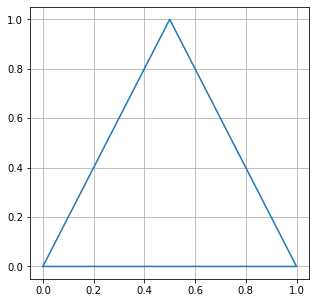

In [29]:
# Generamos el triángulo de base 1 y altura 1

x = np.array([0, 1, 0.5, 0])
y = np.array([0, 0, 1  , 0])

plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.grid()

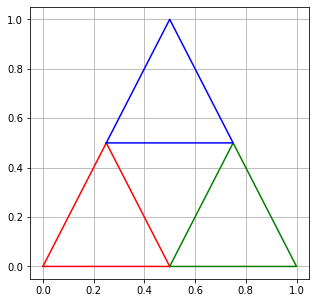

In [30]:
xn1 = 0.5*x + 0
yn1 = 0.5*y + 0

xn2 = 0.5*x + 0.5
yn2 = 0.5*y + 0

xn3 = 0.5*x + 0.25
yn3 = 0.5*y + 0.5

plt.figure(figsize=(5, 5))
plt.plot(xn1, yn1, "r")
plt.plot(xn2, yn2, "g")
plt.plot(xn3, yn3, "b")
plt.grid()

## 2.2 Fractal helecho de Barnsley
El helecho de Barnsley es un fractal que usa cuatro transformaciones afines para generar los nuevos puntos. En la escogencia de cuál transformación usar para generar el siguiente punto es donde entra el componente probabilístico.

Este fractal se puede describir de la siguiente manera:

$$\left[\begin{array}{c}x_{k+1}\\ y_{k+1}\end{array}\right]=\left[\begin{array}{cc}a_i & b_i \\ c_i & d_i\end{array}\right]\left[\begin{array}{c}x_k\\ y_k\end{array}\right]+\left[\begin{array}{c}e_i\\f_i\end{array}\right],$$

donde $a_i$, $b_i$, $c_i$, $d_i$, $e_i$ y $f_i$ son coeficientes que dependen de la variable aleatoria $i\in\left\lbrace 0,1,2,3\right\rbrace$. Las condiciones iniciales son $x_0=y_0=0$.

Las probabilidades de ocurrencia de cada valor de $i$ son $P\left\lbrace i=0\right\rbrace=p_0=0.01$, $P\left\lbrace i=1\right\rbrace=p_1=0.85$, $P\left\lbrace i=2\right\rbrace=p_2=0.07$ y $P\left\lbrace i=3\right\rbrace=p_3=0.07$ (notar que la suma de las probabilidades es 1).

Todas las anteriores constantes se resume en la siguiente tabla (matriz):

In [75]:
# Matriz de Barnsley
import pandas as pd
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi', 'Porción generada'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0.0, 0.85, 0.2, -0.15]
df['bi'] = [0.0, 0.04, -0.26, 0.28]
df['ci'] = [0.0, -0.04, 0.23, 0.26]
df['di'] = [0.16, 0.85, 0.22, 0.24]
df['ei'] = [0.0, 0.0, 0.0, 0.0]
df['fi'] = [0.0, 1.6, 1.6, 0.44]
df['pi'] = [0.01, 0.85, 0.07, 0.07]
df['Porción generada'] = ['Tallo', 'Follaje cada vez más pequeño', 'Ramas izquierda', 'Ramas derecha']

df.round(2)

,ai,bi,ci,di,ei,fi,pi,Porción generada
$i$,,,,,,,,
0,0.00,0.00,0.00,0.16,0.0,0.00,0.01,Tallo
1,0.85,0.04,-0.04,0.85,0.0,1.60,0.85,Follaje cada vez más pequeño
2,0.20,-0.26,0.23,0.22,0.0,1.60,0.07,Ramas izquierda
3,-0.15,0.28,0.26,0.24,0.0,0.44,0.07,Ramas derecha


Con la anterior descripción, generemos el helecho de Barnsley con un código en python...

In [73]:
i

array([0, 1, 2, 3])

In [76]:
np.array(df["pi"])

array([0.01, 0.85, 0.07, 0.07])

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(80)
x = [0]
y = [0]

for k in range(10**5) :
    if k % 10000 == 0 : print(k)
    i_actual = random.choices(i, weights=df["pi"])

    a = float(df["ai"][i_actual])
    b = float(df["bi"][i_actual])
    c = float(df["ci"][i_actual])
    d = float(df["di"][i_actual])
    e = float(df["ei"][i_actual])
    f = float(df["fi"][i_actual])

    xn = float(a*x[-1] + b*y[-1] + e)
    yn = float(c*x[-1] + d*y[-1] + f)

    x.append(xn)
    y.append(yn)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [48]:
xn = np.asarray(x, dtype=float)
yn = np.asarray(y)


C:\Users\Gabo\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


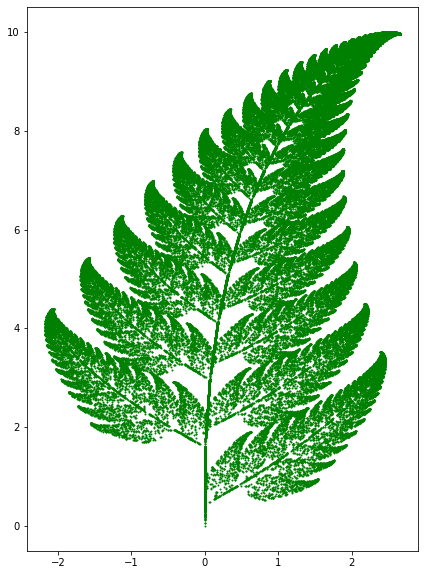

In [55]:
plt.figure(figsize=(7, 10))
plt.scatter(x, y, s=1, c="g")

## 2.3 Mutaciones

Jugando con los coeficientes de la transformación, es posible crear mutaciones del helecho.

#### Mutación Cyclosorus
Un experimentador dió con una tabla de coeficientes que produce otro helecho que se ve muy parecido a la naturaleza. La tabla es la siguiente:

In [77]:
i = np.arange(1,5)

df = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi', 'Porción generada'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0.0, 0.95, 0.035, -0.04]
df['bi'] = [0.0, 0.005, -0.2, 0.2]
df['ci'] = [0.0, -0.005, 0.16, 0.16]
df['di'] = [0.25, 0.93, 0.04, 0.04]
df['ei'] = [0.0, -0.002, -0.09, 0.083]
df['fi'] = [-0.4, 0.5, 0.02, 0.12]
df['pi'] = [0.02, 0.84, 0.07, 0.07]
df['Porción generada'] = ['Tallo', 'Follaje cada vez más pequeño', 'Ramas izquierda', 'Ramas derecha']

df.round(3)

,ai,bi,ci,di,ei,fi,pi,Porción generada
$i$,,,,,,,,
1,0.000,0.000,0.000,0.25,0.000,-0.40,0.02,Tallo
2,0.950,0.005,-0.005,0.93,-0.002,0.50,0.84,Follaje cada vez más pequeño
3,0.035,-0.200,0.160,0.04,-0.090,0.02,0.07,Ramas izquierda
4,-0.040,0.200,0.160,0.04,0.083,0.12,0.07,Ramas derecha


La actividad consiste en generar el helecho mutante con los coeficientes de esta nueva tabla.

In [78]:
x = [0]
y = [0]

for k in range(10**5) :
    if k % 10000 == 0 : print(k)
    i_actual = random.choices(i, weights=df["pi"])

    a = float(df["ai"][i_actual])
    b = float(df["bi"][i_actual])
    c = float(df["ci"][i_actual])
    d = float(df["di"][i_actual])
    e = float(df["ei"][i_actual])
    f = float(df["fi"][i_actual])

    xn = float(a*x[-1] + b*y[-1] + e)
    yn = float(c*x[-1] + d*y[-1] + f)

    x.append(xn)
    y.append(yn)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [80]:
print (3)

3


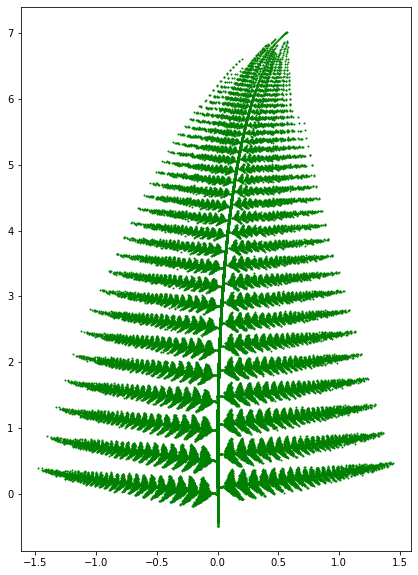

In [79]:
plt.figure(figsize=(7, 10))
plt.scatter(x, y, s=1, c="g")

In [ ]:
print(x)

In [ ]:
x=3

#### Actividad - Mutación Culcita
Un experimentador dió con una tabla de coeficientes que produce otro helecho que se ve muy parecido a la naturaleza. La tabla es la siguiente:

In [61]:
i = np.arange(1,5)

df = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi', 'Porción generada'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0.0, 0.85, 0.09, -0.09]
df['bi'] = [0.0, 0.02, -0.28, 0.28]
df['ci'] = [0.0, -0.02, 0.3, 0.3]
df['di'] = [0.25, 0.83, 0.11, 0.09]
df['ei'] = [0.0, 0.0, 0.0, 0.0]
df['fi'] = [-0.14, 1.0, 0.6, 0.7]
df['pi'] = [0.02, 0.84, 0.07, 0.07]
df['Porción generada'] = ['Tallo', 'Follaje cada vez más pequeño', 'Ramas izquierda', 'Ramas derecha']

df.round(3)

,ai,bi,ci,di,ei,fi,pi,Porción generada
$i$,,,,,,,,
1,0.00,0.00,0.00,0.25,0.0,-0.14,0.02,Tallo
2,0.85,0.02,-0.02,0.83,0.0,1.00,0.84,Follaje cada vez más pequeño
3,0.09,-0.28,0.30,0.11,0.0,0.60,0.07,Ramas izquierda
4,-0.09,0.28,0.30,0.09,0.0,0.70,0.07,Ramas derecha


---
La escencia de fractales aleatorios no es partir de una tabla y generar funciones distribuidas con cierta probabilidad, ya que se puede partir de funciones dadas y ejecutar el mismo proceso, es decir
$$
\begin{bmatrix}
x_{k+1}\\y_{k+1}
\end{bmatrix}=f_i(x_k,y_k)
$$
donde $f_i(x_k,y_k)$ son funciones que dependen la la variable aleatoria $i\in \{0,1,\dots\}$.

En los ejemplos anteriores las funciones $f_i(x_k,y_k)$ eran transformaciones afines (multiplicación y suma), pero pueden ser funciones no lineales. Por ejemplo:

#### Twindragon
Siendo
$$f_1(x,y)=\begin{bmatrix}\mathcal{Re}\left\{\frac{\sqrt{2}}{2}e^{\frac{1}{4}\pi j}(x+yj)\right\}\\\mathcal{Im}\left\{\frac{\sqrt{2}}{2}e^{\frac{1}{4}\pi j}(x+yj)\right\}\end{bmatrix}$$
y
$$f_2(x,y)=\begin{bmatrix}\mathcal{Re}\left\{\frac{\sqrt{2}}{2}e^{\frac{3}{4}\pi j}(x+yj)+55j\right\}\\\mathcal{Im}\left\{\frac{\sqrt{2}}{2}e^{\frac{3}{4}\pi j}(x+yj)+55j\right\}\end{bmatrix}$$
entonces
$$
\begin{bmatrix}
x_{k+1}\\y_{k+1}
\end{bmatrix}=f_i(x_k,y_k)
$$
donde $j=\sqrt{-1}$ es la unidad imaginaria, $i=\{1,2\}$ es la variable aleatoria distribuida con la misma probabilidad; y condiciones iniciales $x_0=0$, $y_0=0$.

## 3. Otra aplicación (elegible para proyecto)
Un paisaje fractal es una superficie generada usando un algoritmo estocástico diseñado para producir un comportamiento fractal que mimetiza la apariencia de un terreno natural. En otras palabras, el resultado de este procedimiento no es una superficie fractal determinística, sino una superficie aleatoria que exhibe comportamiento fractal.

<img style="float: left; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Animated_fractal_mountain.gif" width="300px" height="100px" />

<img style="float: center; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/6/6e/FractalLandscape.jpg" width="300px" height="100px" />

<img style="float: right; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Fractal_terrain_texture.jpg" width="300px" height="100px" />

**Referencia:**
- https://en.wikipedia.org/wiki/Fractal_landscape